# Assignment: Project - 4: Unsupervised Learning

#### submitted by Subodh Nath Pushpak

The data contains features extracted from the silhouette of  vehicles in different angles. Four "Corgie" model vehicles were  used for the experiment: a double decker bus, Cheverolet van,  Saab 9000 and an Opel Manta 400 cars. This particular  combination of vehicles was chosen with the expectation that  the bus, van and either one of the cars would be readily  distinguishable, but it would be more difficult to distinguish  between the cars.  
### Domain: Object recognition  
### Context
The purpose is to classify a given silhouette as one of three  types of vehicle, using a set of features extracted from the  silhouette. The vehicle may be viewed from one of many  different angles.  

### Objective
#### Apply the dimensionality reduction technique – PCA and train  a model using principal components instead of training the  model using just the raw data. 

#### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from scipy.stats import zscore
from sklearn import model_selection
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

### Task 1: Data pre-processing – Perform all necessary  preprocessing on the data ready to be fed to an  Unsupervised algorithm 

#### Task 1 a. Load the Dataset and find the datatypes

In [2]:
# loading the data
dataFilePath = './vehicle.csv'
data_df= pd.read_csv(dataFilePath)
data_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
# shape of the data
rows, cols = data_df.shape 
print (f"There are {rows} observations / rows and {cols} attributes / columns")

There are 846 observations / rows and 19 attributes / columns


In [4]:
# Data type of each attribute
data_df.info() # Info on each of the attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
data_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

### Inference 
1. All are numeric in nature
2. Out of total 19 columns, 14 are of float64 type, 4 are of int64 type and 1 is of object type
3. 'class' column is our target column
4. There are missing values in many columns like circularity, distance circularity, radius_ratio, pr.axis_aspect_ratio, etc.

### Task 1 b. Missing Value identification and appropriate actions

In [6]:
# determine if any value is null
data_df.isnull().values.any() 

True

In [7]:
# determine the sum of na values
data_df.apply(lambda x : sum(x.isnull()))

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
#List all the rows having missing value in any of the single or multiple columns
missing_values_cols=data_df.columns[data_df.isnull().any()]
data_df[data_df.isnull().any(axis=1)][missing_values_cols].head()

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
5           NaN                 106.0         172.0                  50.0   
9          44.0                  98.0           NaN                  62.0   
19         56.0                 100.0         215.0                   NaN   
35         46.0                   NaN         172.0                  67.0   
66         43.0                  68.0         125.0                  57.0   

    scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
5           255.0           26.0                    28.0            280.0   
9           183.0           36.0                    22.0            202.0   
19          208.0           32.0                    24.0            227.0   
35          157.0           43.0                    20.0            170.0   
66          149.0           46.0                    19.0            169.0   

    scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
5               957.0                      264.0                         85.0   
9               505.0                      152.0                         64.0   
19              651.0                      223.0                         74.0   
35              363.0                      184.0                         67.0   
66              323.0                      172.0                          NaN   

    skewness_about  skewness_about.1  skewness_about.2  
5              5.0               9.0             181.0  
9              4.0              14.0             195.0  
19             6.0               5.0             186.0  
35            17.0               7.0             192.0  
66             NaN              18.0             179.0

In [9]:
missingRows, missingCols = data_df[data_df.isnull().any(axis=1)][missing_values_cols].shape
print (f"There are {missingRows} rows with {missingCols} missing columns")

There are 33 rows with 14 missing columns


### Inference
1. There are null values in some of the features
2. There are 33 missing rows and 14 missing columns. 'radius_ratio' and 'skewness_about' has 6 missing values
3. We can either drop the values or 'fill' the values with most appropiate values. Eye balling the 5 point summary might provide data for best analysis 

#### 5 Point Summary

In [10]:
# Eye ball the data
data_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

#### Inference
1. By analysing the above data, since dropping the rows might result in loss of data, its better to replace the missing values with median

In [11]:
# Make a copy of dataframe before replacing missing values with median; just in case the original dataframe requires to be revisited
data_df_Original = data_df.copy()

#### Replace the missing values with median

In [12]:
data_df.fillna(data_df.median(),axis=0,inplace=True)

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

#### Eye ball the data again after replacing missing values 

#### 5 Point Summary

In [14]:
# Eye ball the data
data_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

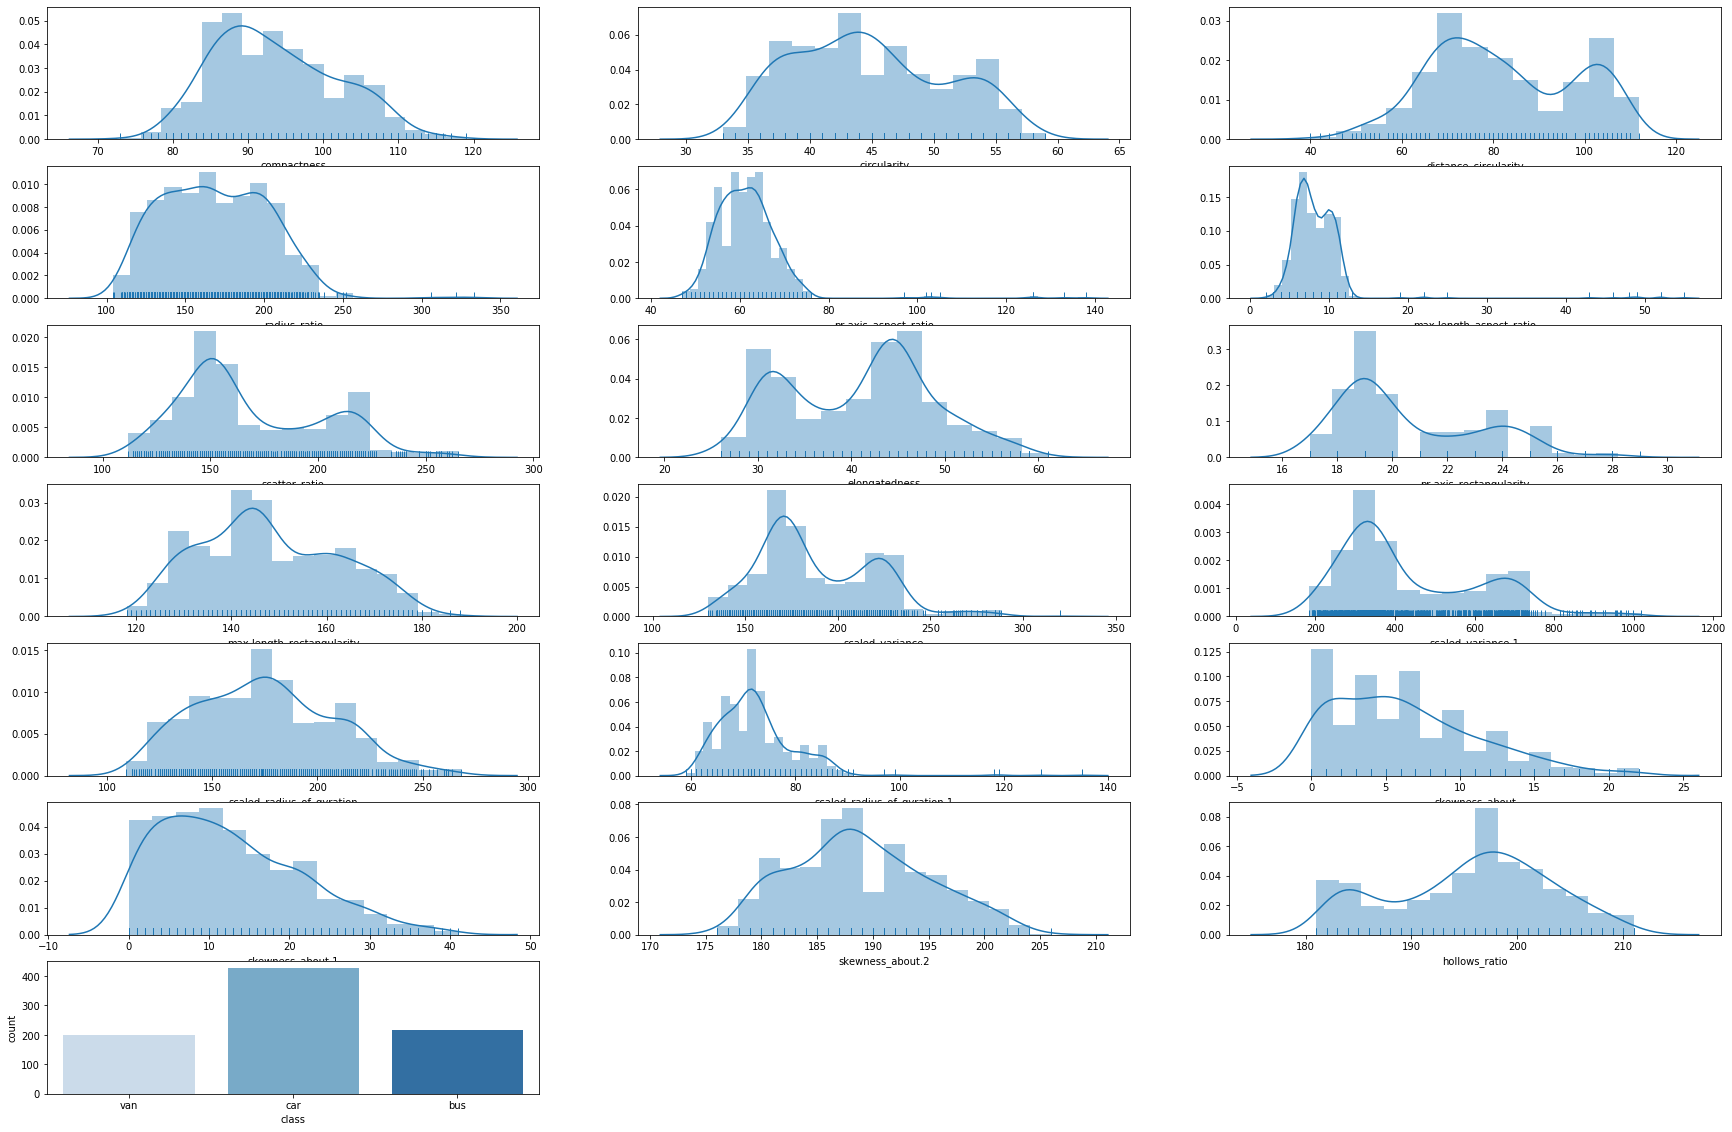

In [15]:
plt.figure(figsize= (30,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
totalrows, totalcols = data_df.shape
categorical_vars = data_df.describe(include=["object"]).columns
continuous_vars = data_df.describe(exclude=['object']).columns

for feature in data_df.columns: 
    plt.subplot(7, 3, pos)   # plot grid
    if feature in continuous_vars:   # Plot histogram for all the continuous columns
             sns.distplot(data_df[feature], kde= True,rug = True )  
    if feature in categorical_vars:
            sns.countplot(data_df[feature], palette= 'Blues')    # Plot bar chart for all the categorical columns
            #sns.barplot(data_df[feature].value_counts().values, data_df[feature].value_counts().index)
    pos += 1  # to plot over the grid one by one  

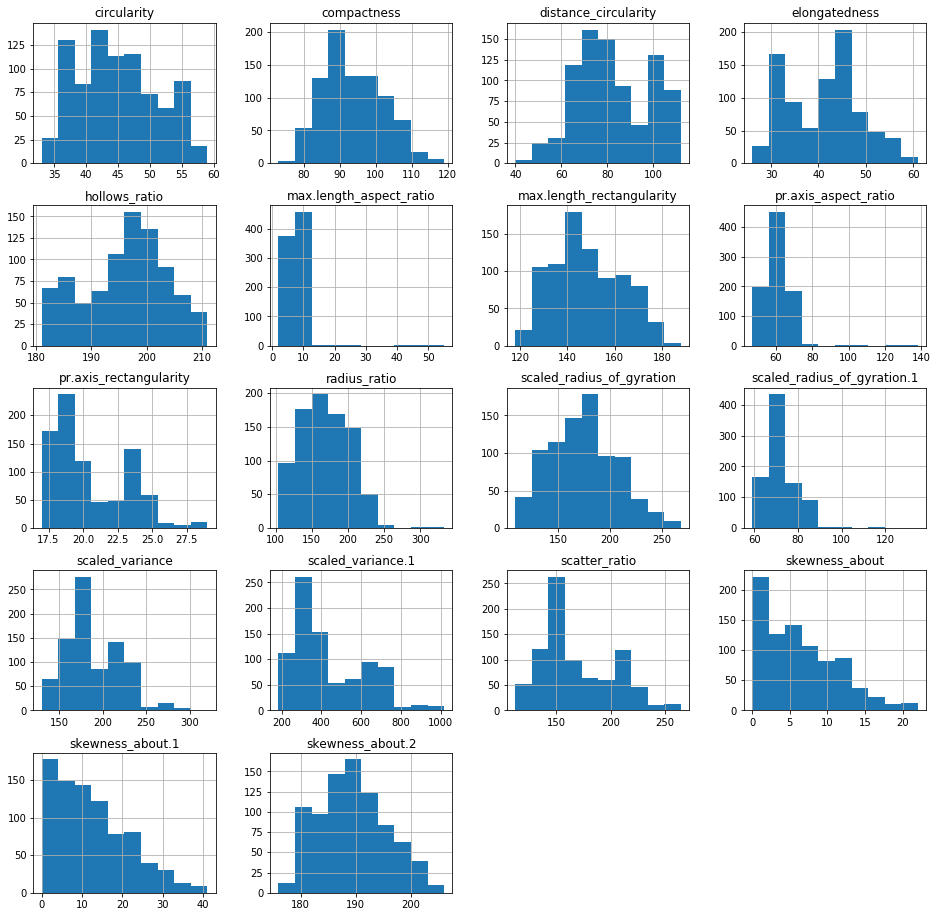

In [16]:
# List numerical columns
numerical_cols = list(data_df.select_dtypes(exclude=['object']))
_= data_df.hist(column=numerical_cols, figsize = (16,16))

In [17]:
print(f"Skweness is: \n{data_df.skew()}")

Skweness is: 
compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
dtype: float64


### Task 1 c. Outlier identification and appropriate actions

#### Plot box plots to visualize outliers easily

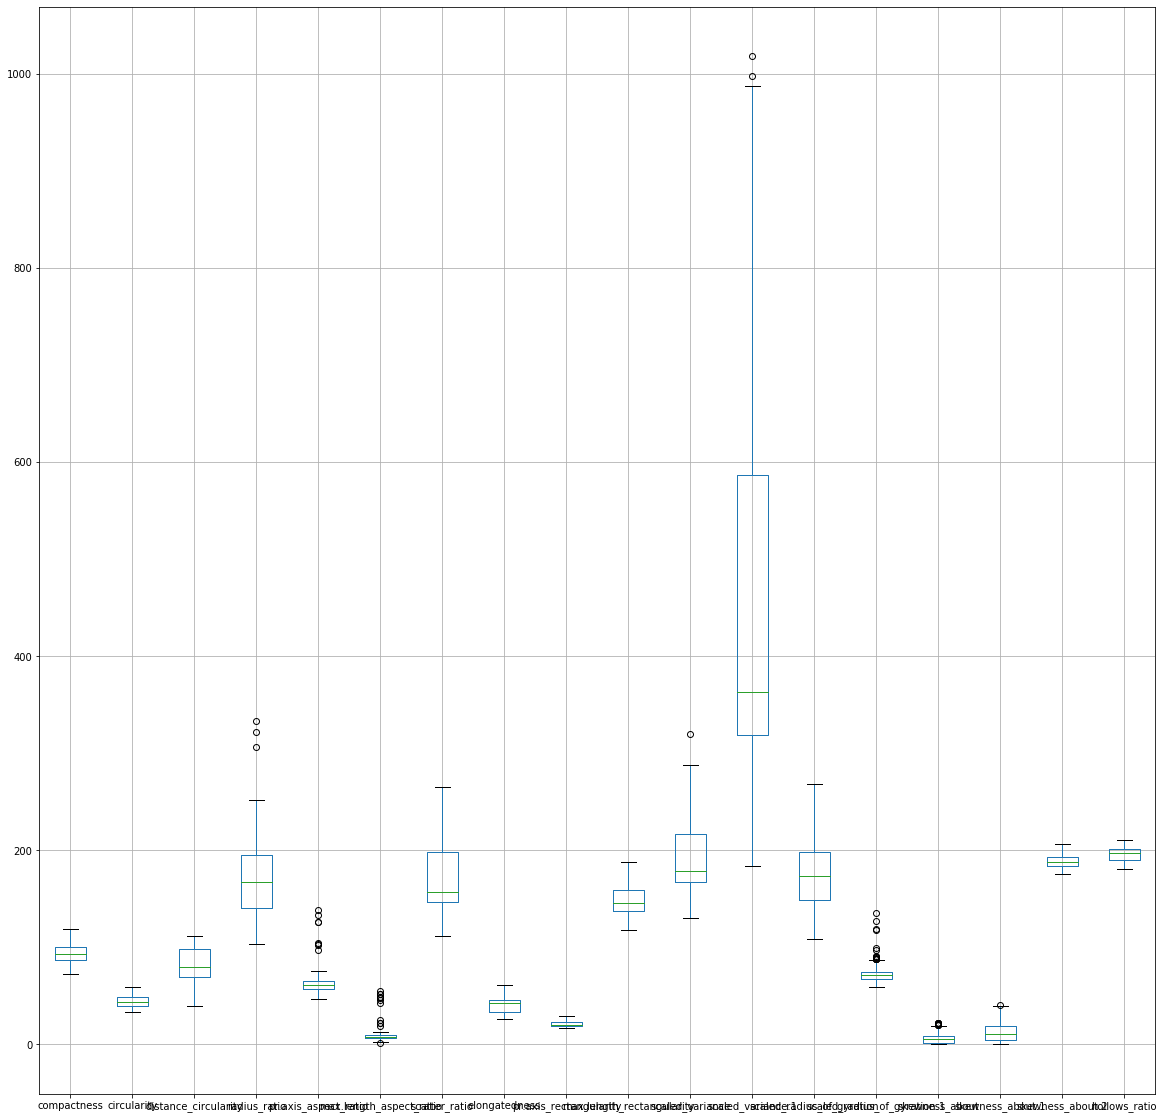

In [18]:
numerical_cols = list(data_df.select_dtypes(exclude=['object']))
_= data_df.boxplot(column=numerical_cols, figsize = (20,20))

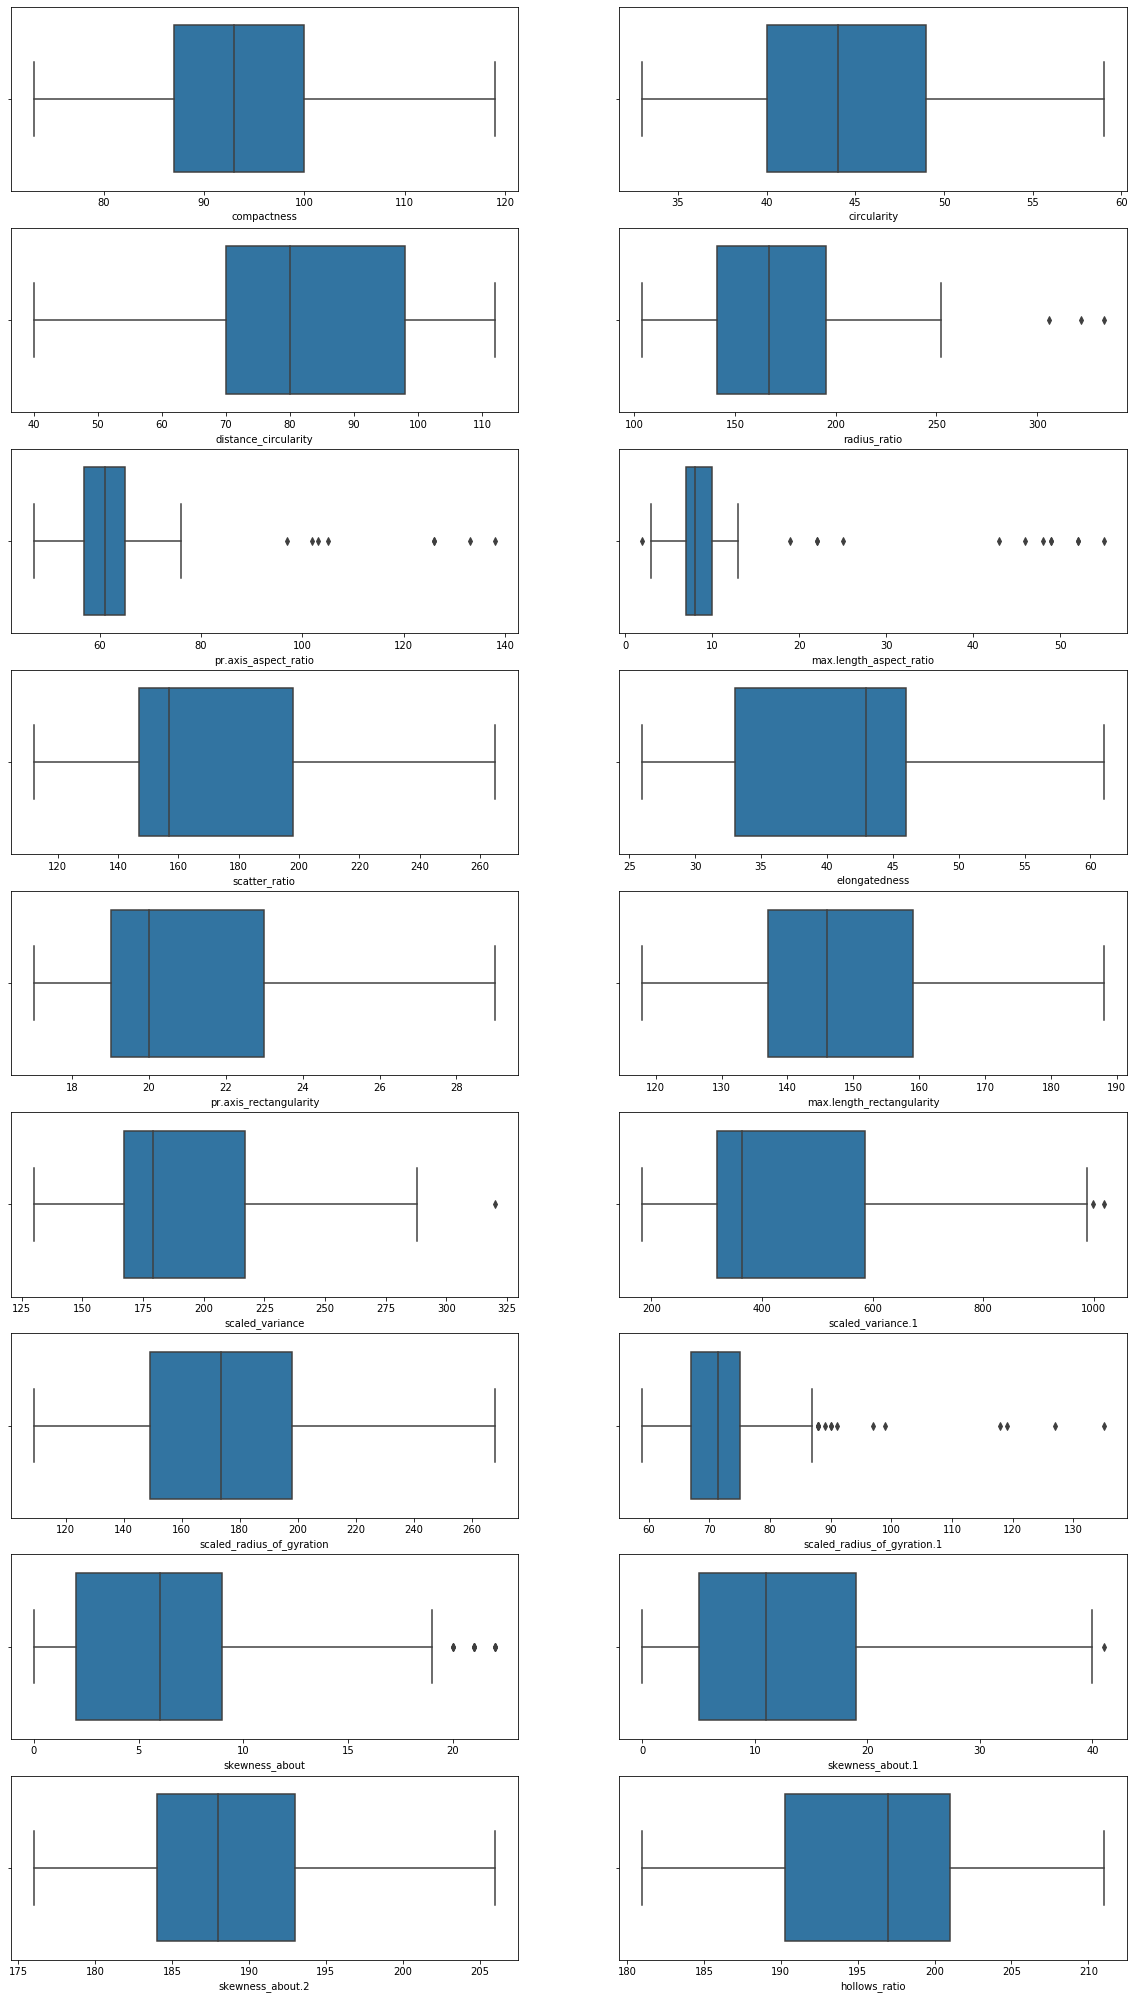

In [19]:
plt.figure(figsize= (20,40)) 
continuous_vars = data_df.describe(exclude=['object']).columns
pos = 1
for feature in continuous_vars: 
    plt.subplot(10, 2, pos)   # plot grid
    sns.boxplot(data_df[feature])
       # plt.title(feature)
    pos += 1  # to plot over the grid one by one  


In [20]:
# function to determine outliers of given series
def determineAndReplaceOutliers(aSeries, columnName):
    
    q1 = aSeries.quantile(0.25)
    q3 = aSeries.quantile(0.75)
   
    iqr = q3-q1 #Interquartile range
    threshold_low  = q1-1.5*iqr
    threshold_high = q3+1.5*iqr
    outliers_low = aSeries[(aSeries < threshold_low)]
    outliers_high= aSeries[(aSeries > threshold_high)]
    
    #print ("Q1: ", q1)
    print(f'threshold low: {threshold_low} \nlow outliers count =', outliers_low.count())
    #print('Outliers low: \n')
    #print(outliers_low)
    data_df.loc[outliers_low.index, columnName] = threshold_low
    print(f'replaced {outliers_low.count()} low outliers with (q1-1.5*iqr) = {threshold_low}')

    #print ("Q3: ", q3)
    print(f'threshold high: {threshold_high} \nhigh outliers count = {outliers_high.count()}')
    #print('Outliers high: \n')
    #print(outliers_high)
   
    data_df.loc[outliers_high.index, columnName] = threshold_high
    print(f'replaced {outliers_high.count()} high outliers with (q1+1.5*iqr) = {threshold_high}')
    
    return threshold_low,  outliers_low, threshold_high, outliers_high

In [21]:
columnName = 'radius_ratio'
threshold_low, outliers_low, threshold_high,  outliers_high = determineAndReplaceOutliers(data_df[columnName],columnName)

threshold low: 60.0 
low outliers count = 0
replaced 0 low outliers with (q1-1.5*iqr) = 60.0
threshold high: 276.0 
high outliers count = 3
replaced 3 high outliers with (q1+1.5*iqr) = 276.0


In [22]:
columnName = 'pr.axis_aspect_ratio'
threshold_low, outliers_low, threshold_high,  outliers_high = determineAndReplaceOutliers(data_df[columnName],columnName)

threshold low: 45.0 
low outliers count = 0
replaced 0 low outliers with (q1-1.5*iqr) = 45.0
threshold high: 77.0 
high outliers count = 8
replaced 8 high outliers with (q1+1.5*iqr) = 77.0


In [23]:
columnName = 'max.length_aspect_ratio'
threshold_low, outliers_low, threshold_high,  outliers_high = determineAndReplaceOutliers(data_df[columnName],columnName)

threshold low: 2.5 
low outliers count = 1
replaced 1 low outliers with (q1-1.5*iqr) = 2.5
threshold high: 14.5 
high outliers count = 12
replaced 12 high outliers with (q1+1.5*iqr) = 14.5


In [24]:
columnName = 'max.length_aspect_ratio'
threshold_low, outliers_low, threshold_high,  outliers_high = determineAndReplaceOutliers(data_df[columnName],columnName)

threshold low: 2.5 
low outliers count = 0
replaced 0 low outliers with (q1-1.5*iqr) = 2.5
threshold high: 14.5 
high outliers count = 0
replaced 0 high outliers with (q1+1.5*iqr) = 14.5


In [25]:
columnName = 'scaled_variance'
threshold_low, outliers_low, threshold_high,  outliers_high = determineAndReplaceOutliers(data_df[columnName],columnName)

threshold low: 92.0 
low outliers count = 0
replaced 0 low outliers with (q1-1.5*iqr) = 92.0
threshold high: 292.0 
high outliers count = 1
replaced 1 high outliers with (q1+1.5*iqr) = 292.0


In [26]:
columnName = 'scaled_variance.1'
threshold_low, outliers_low, threshold_high,  outliers_high = determineAndReplaceOutliers(data_df[columnName],columnName)

threshold low: -84.5 
low outliers count = 0
replaced 0 low outliers with (q1-1.5*iqr) = -84.5
threshold high: 989.5 
high outliers count = 2
replaced 2 high outliers with (q1+1.5*iqr) = 989.5


In [27]:
columnName = 'scaled_radius_of_gyration.1'
threshold_low, outliers_low, threshold_high,  outliers_high = determineAndReplaceOutliers(data_df[columnName],columnName)

threshold low: 55.0 
low outliers count = 0
replaced 0 low outliers with (q1-1.5*iqr) = 55.0
threshold high: 87.0 
high outliers count = 15
replaced 15 high outliers with (q1+1.5*iqr) = 87.0


In [28]:
columnName = 'skewness_about'
threshold_low, outliers_low, threshold_high,  outliers_high = determineAndReplaceOutliers(data_df[columnName],columnName)

threshold low: -8.5 
low outliers count = 0
replaced 0 low outliers with (q1-1.5*iqr) = -8.5
threshold high: 19.5 
high outliers count = 12
replaced 12 high outliers with (q1+1.5*iqr) = 19.5


#### Inference
1. There are high outliers in radius_ratio
2. Instead of dropping the rows; we have replaced the low outliers with (Q1 - 1.5 IQR) and  high outliers with (Q3 + 1.5 IQR)

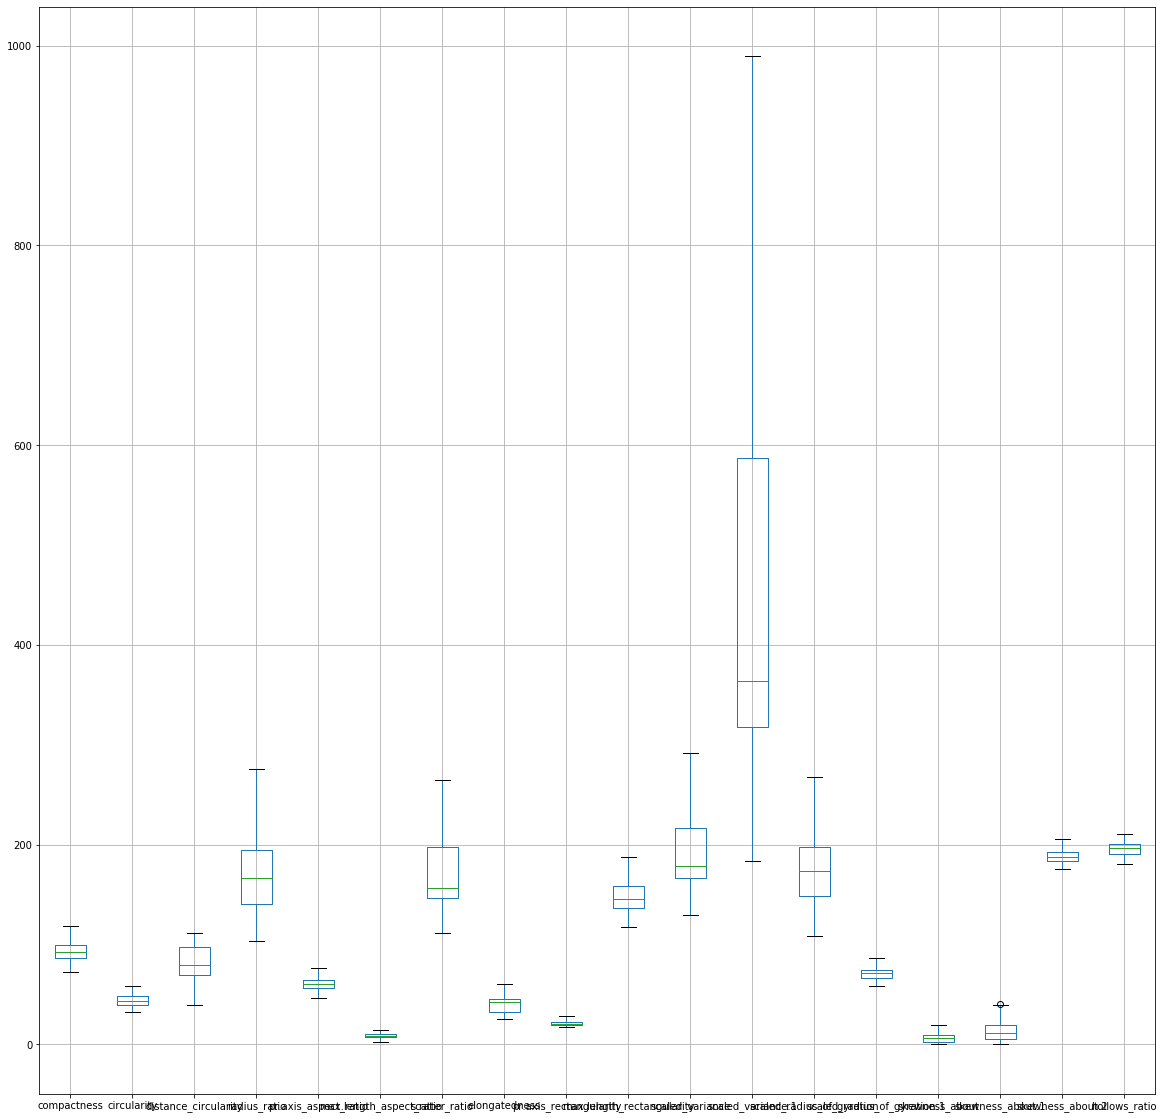

In [29]:
numerical_cols = list(data_df.select_dtypes(exclude=['object']))
_= data_df.boxplot(column=numerical_cols, figsize = (20,20))

#### From the above box plot, it is evident that the missing value and outliers of the data is take care of and there is no outliers now in the dataset

### Task 2 : 2. Understanding the attributes - Find relationships between  different attributes (Independent variables) and choose  carefully which all attributes have to be a part of the  analysis and why   

#### Task 2 a: 5 Point Summary

In [30]:
# Eye ball the data
data_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.717494   32.779404  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.306147    5.819342   47.0   57.00   
max.length_aspect_ratio      846.0    8.203901    2.206520    2.5    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.563830   31.236113  130.0  167.00   
scaled_variance.1            846.0  439.270686  176.356820  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.218676    6.471197   59.0   67.00   
skewness_about               846.0    6.339243    4.838044    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%    max  
compactness                   93.0  100.00  119.0  
circularity                   44.0   49.00   59.0  
distance_circularity          80.0   98.00  112.0  
radius_ratio                 167.0  195.00  276.0  
pr.axis_aspect_ratio          61.0   65.00   77.0  
max.length_aspect_ratio        8.0   10.00   14.5  
scatter_ratio                157.0  198.00  265.0  
elongatedness                 43.0   46.00   61.0  
pr.axis_rectangularity        20.0   23.00   29.0  
max.length_rectangularity    146.0  159.00  188.0  
scaled_variance              179.0  217.00  292.0  
scaled_variance.1            363.5  586.75  989.5  
scaled_radius_of_gyration    173.5  198.00  268.0  
scaled_radius_of_gyration.1   71.5   75.00   87.0  
skewness_about                 6.0    9.00   19.5  
skewness_about.1              11.0   19.00   41.0  
skewness_about.2             188.0  193.00  206.0  
hollows_ratio                197.0  201.00  211.0

### Task 2 b: Univariate Analysis & its distributions

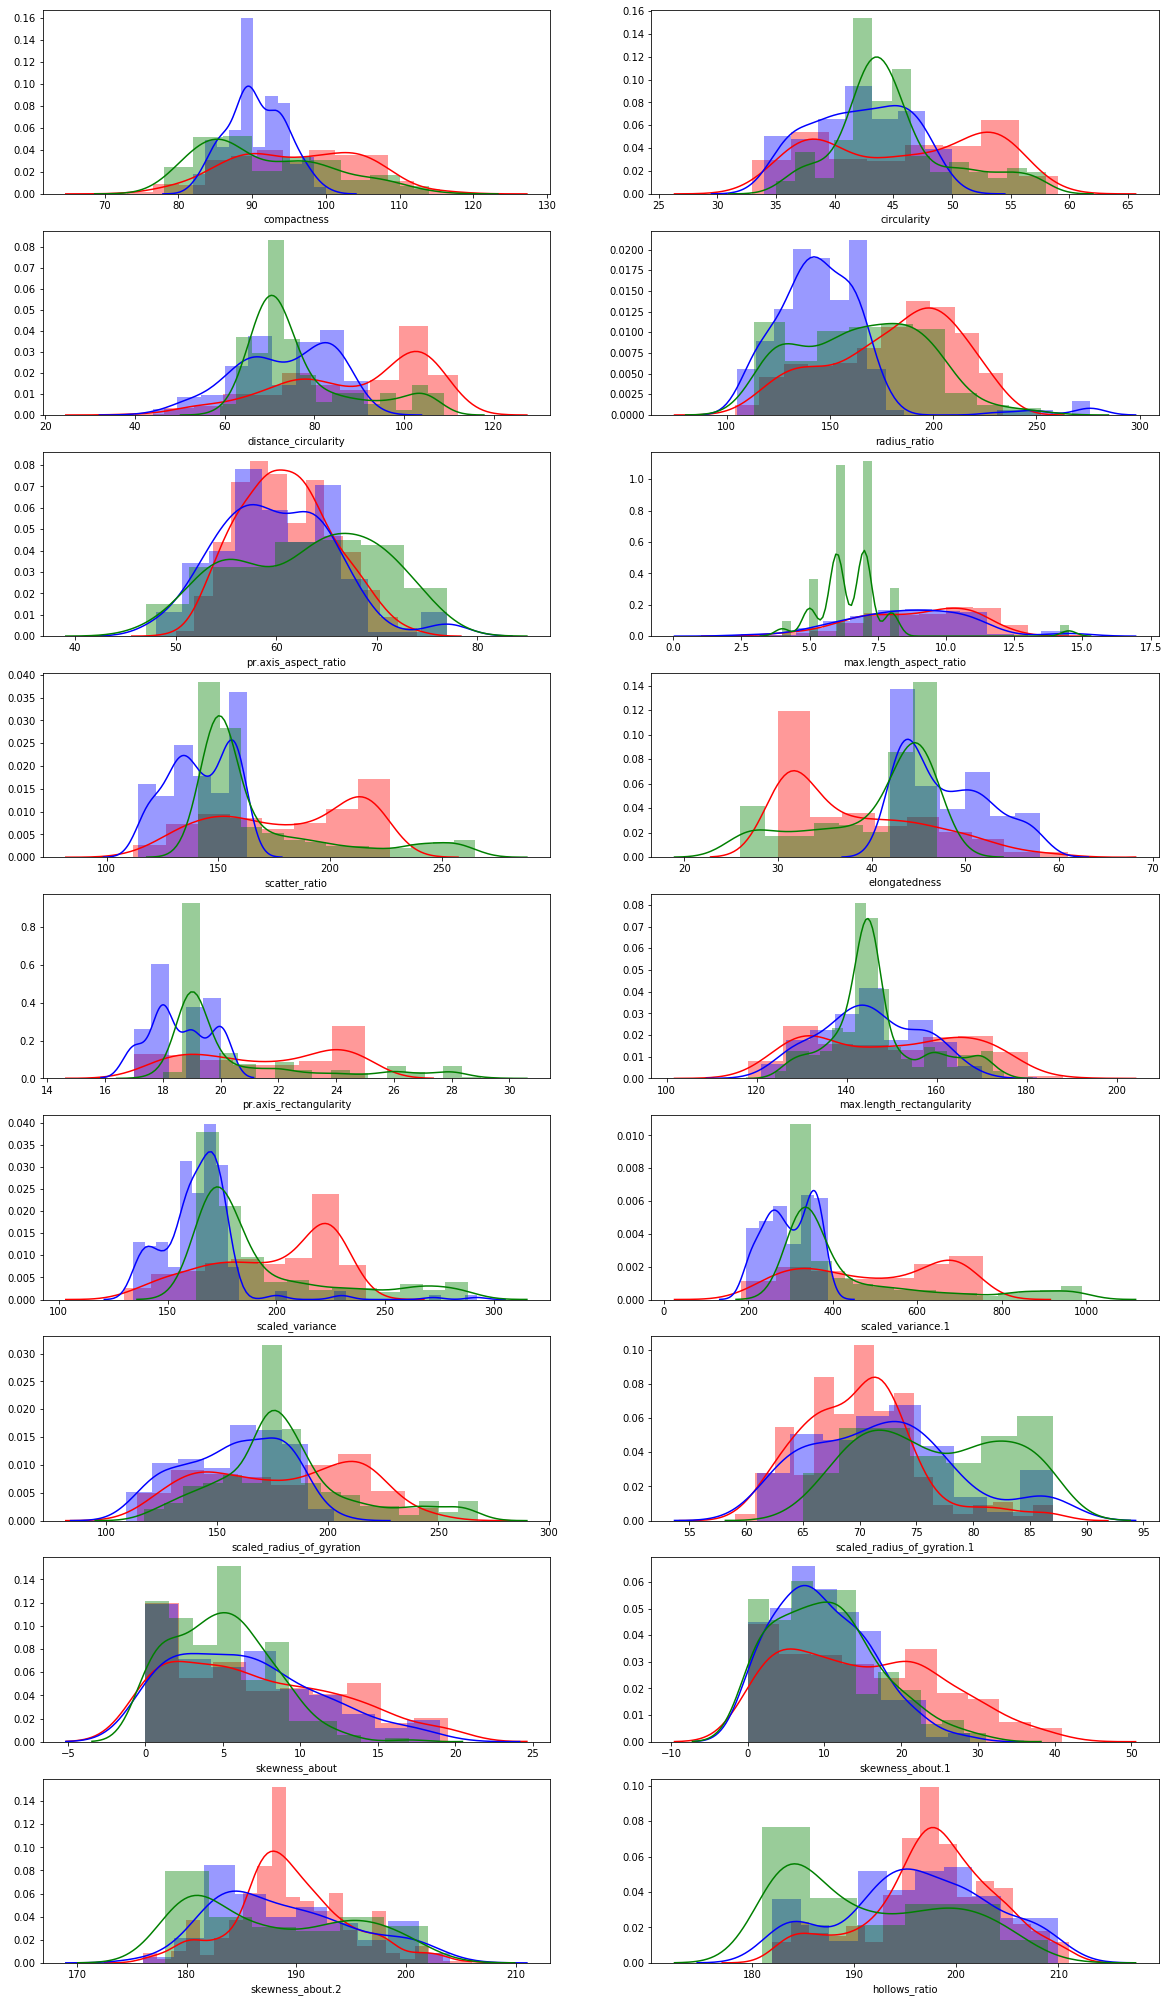

In [31]:
plt.figure(figsize= (20,40)) 
columns_vars = data_df.drop('class',axis=1).columns #data_df.columns 
pos = 1
for feature in columns_vars: 
    plt.subplot(10, 2, pos)   # plot grid
    sns.distplot( data_df[data_df['class'] == 'car'][feature], color = 'r')
    sns.distplot( data_df[data_df['class'] == 'van'][feature], color = 'b')
    sns.distplot( data_df[data_df['class'] == 'bus'][feature], color = 'g')
    pos += 1  # to plot over the grid one by one  

#### Inference
* Spread of compactness is least for van. mean compactness is highest for car. For Bus compactness is right skewed
* Mean circularity is higher for cars
* Mean distance_circularity is also higher for cars
* Mean radius_ratio is higher for cars, followed by Bus. It is least for vans
* pr.axis_aspect_ratio is has almost same distribution for car, van and buses
* max.length_aspect_ratio is almost same for cars and vans, lower for buses
* Mean scatter ratio is highest for cars, followed by bus and van
* Mean elomngatedness is highest for vans folowed by bus and car
* pr.axis_rectangularity is highest for cars, followed by bus and then vans
* distribution of max.length_rectangularity is almost same for cars, bus and vans

### Task 2 c: Infer the insights about the relationship among the variables

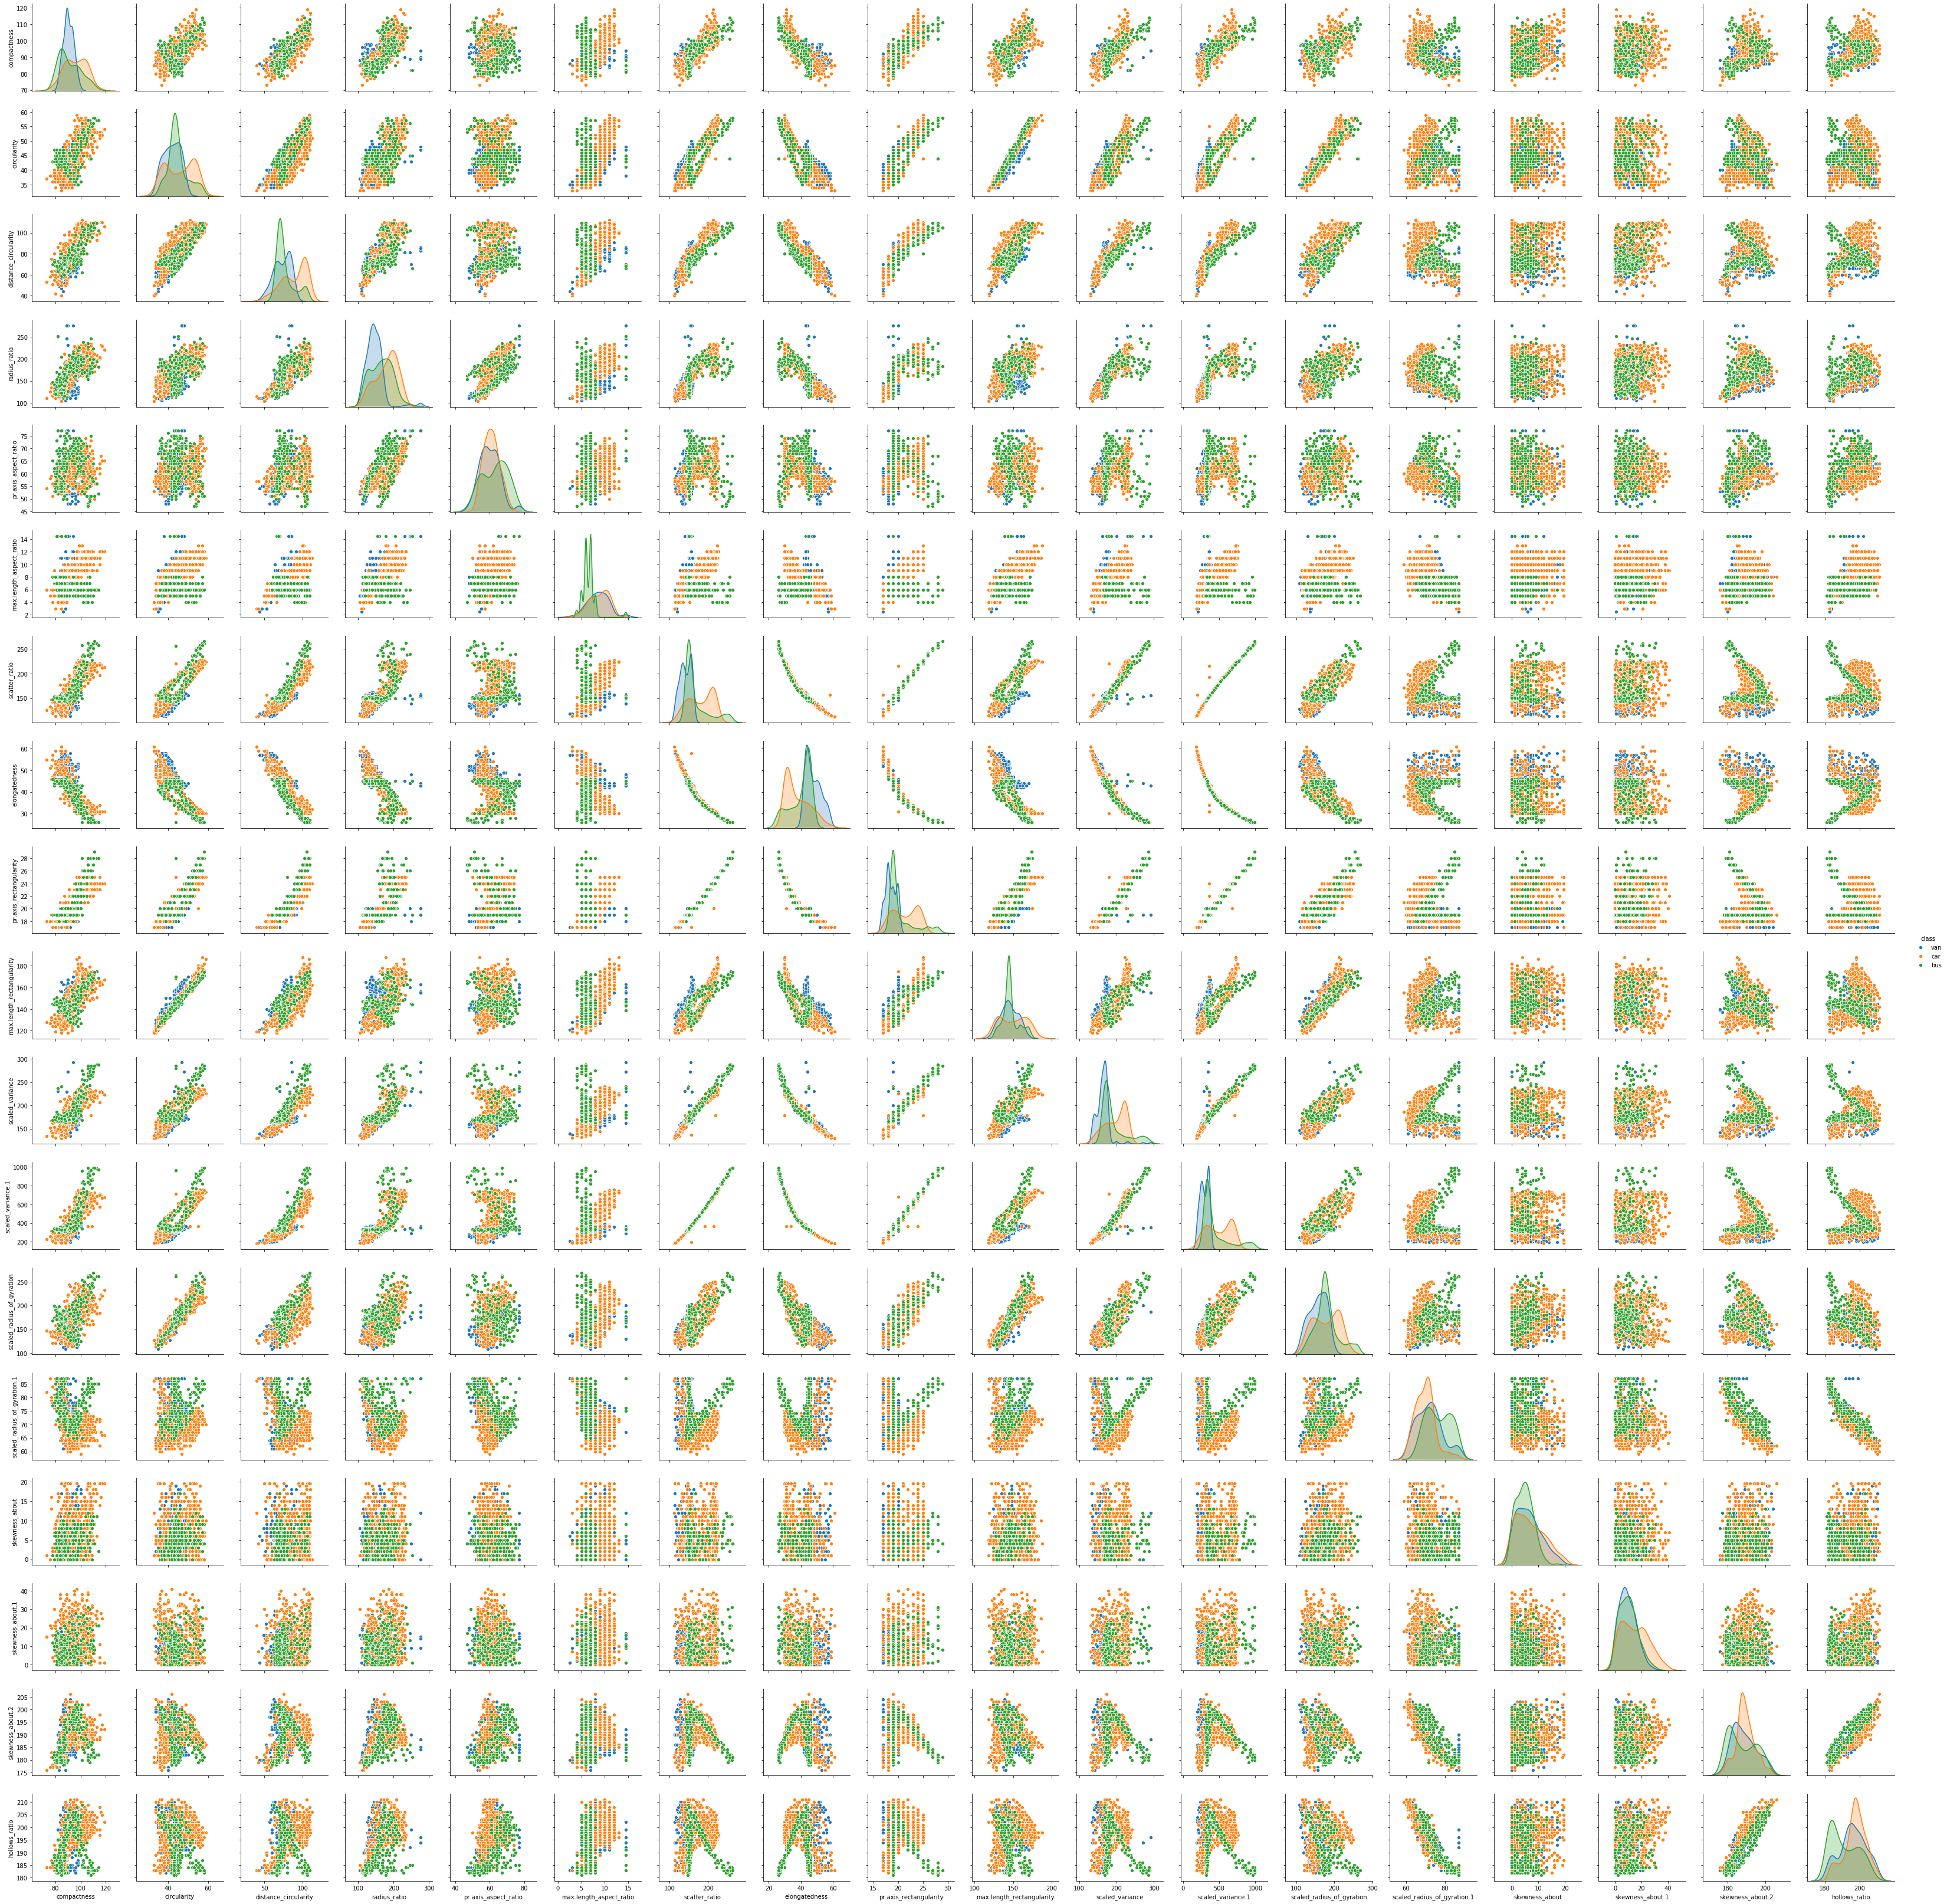

In [32]:
sns.pairplot(data_df,hue='class',diag_kind='kde')
plt.show()

In [33]:
data_df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.704177     0.630813              0.780846   
pr.axis_aspect_ratio            0.166905     0.197870              0.228494   
max.length_aspect_ratio         0.437331     0.523972              0.611158   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.765062     0.799099              0.864753   
scaled_variance.1               0.814141     0.836074              0.886353   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.263751     0.056482             -0.247726   
skewness_about                  0.233761     0.144552              0.113352   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.704177              0.166905   
circularity                      0.630813              0.197870   
distance_circularity             0.780846              0.228494   
radius_ratio                     1.000000              0.680872   
pr.axis_aspect_ratio             0.680872              1.000000   
max.length_aspect_ratio          0.497668              0.230382   
scatter_ratio                    0.750288              0.173201   
elongatedness                   -0.805868             -0.275304   
pr.axis_rectangularity           0.724116              0.142643   
max.length_rectangularity        0.576439              0.149545   
scaled_variance                  0.794518              0.239357   
scaled_variance.1                0.734821              0.157296   
scaled_radius_of_gyration        0.544864              0.148468   
scaled_radius_of_gyration.1     -0.328059             -0.246665   
skewness_about                   0.049200             -0.057076   
skewness_about.1                 0.177316             -0.027450   
skewness_about.2                 0.391791              0.368533   
hollows_ratio                    0.480752              0.389627   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.437331       0.812620   
circularity                                 0.523972       0.847938   
distance_circularity                        0.611158       0.905076   
radius_ratio                                0.497668       0.750288   
pr.axis_aspect_ratio                        0.230382       0.173201   
max.length_aspect_ratio                     1.000000       0.439612   
scatter_ratio                               0.439612       1.000000   
elongatedness                              -0.456838      -0.971601   
pr.axis_rectangularity                      0.434980       0.989751   
max.length_rectangularity                   0.608645       0.809083   
scaled_variance                             0.415483       0.952882   
scaled_variance.1                           0.398807       0.993085   
scaled_radius_of_gyration                   0.374258       0.799875   
scaled_radius_of_gyration.1                -0.257113      -0.012569   
skewness_about                              0.084582       0.073986   
skewness_about.1                            0.129260       0.212428   
skewness_about.2                            0.

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

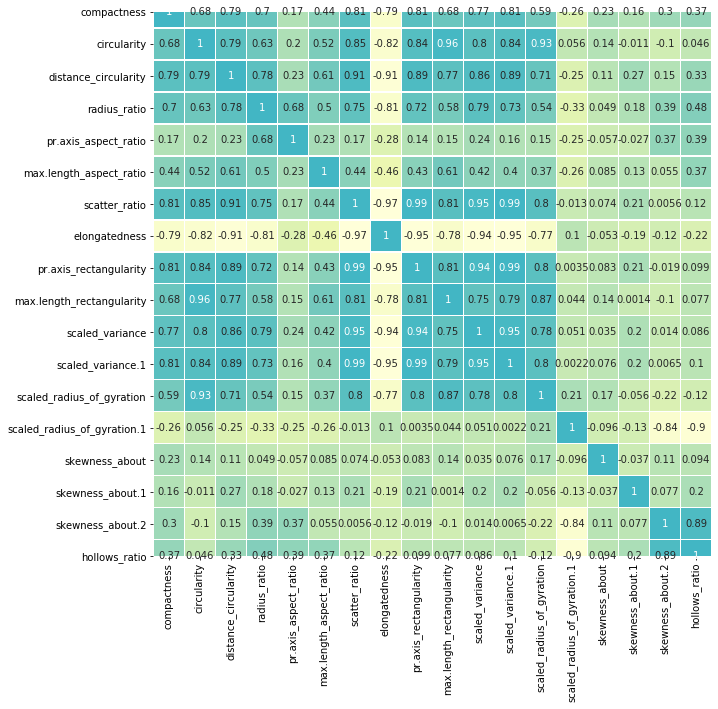

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(data_df.corr(),
            annot=True,
            linewidths=.5,
            center=1,
            cbar=False,
            cmap="YlGnBu")
plt.show()

#### Inference
* Mean scaled variance and Mean scaled variance1 is highest for cars followed by bus then vans
* 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', have almost similar distribution for cars, buses and vans.
* 'hollows_ratio' is lower for buses as compared to cars and vans
* Many columns have long tails indicating outliers
* Scatter ratio & Scaled_variance1 has almost perfect positive linear relationship
* Many features show high correlation indicating that we might drop features which may be overlapping effect
* From above correlation matrix we can see that there are many features which are highly correlated.
* We can choose to drop one of highly correlated column but since we are attempting PCA, which is based on dimesionality reduction; we will NOT drop these columns

#### Task 2 d: Separate the Feature and Target variable

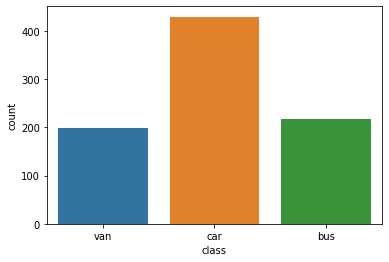

In [35]:
sns.countplot(data_df['class'])
plt.show()

In [36]:
data_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

#### Data transformations (Type changes/appropriate scaling of variables and encoding variables if required)

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_df['class'] = labelencoder.fit_transform(data_df['class'])
data_df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

#### 1 - car
#### 0 - bus
#### 2 - van

In [38]:
# independant variables
X = data_df.drop('class',axis=1)
# the dependent variable
y = data_df['class']
print("shape of independent variable: ",X.shape)
print("shape of dependent variable: ",y.shape)

shape of independent variable:  (846, 18)
shape of dependent variable:  (846,)


#### Task 2 e: Scaling of the data

In [39]:
# scale independent attributes
from scipy.stats import zscore
X = X.apply(zscore)
X.head

<bound method NDFrame.head of      compactness  circularity  distance_circularity  radius_ratio  \
0       0.160580     0.518073              0.057177      0.283349   
1      -0.325470    -0.623732              0.120741     -0.846077   
2       1.254193     0.844303              1.519141      1.229624   
3      -0.082445    -0.623732             -0.006386     -0.296627   
4      -1.054545    -0.134387             -0.769150      1.107524   
..           ...          ...                   ...           ...   
841    -0.082445    -0.949961              0.311432      0.435974   
842    -0.568495     0.191843              0.120741     -0.174527   
843     1.497218     1.496763              1.201323      1.626449   
844    -0.933032    -1.439306             -0.260641     -0.693452   
845    -1.054545    -1.439306             -1.023405     -1.395527   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                1.838727                 0.814478      -0.207598   
1  

In [40]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.70501074  0.16710246  0.437849
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76596737  0.81510445
   0.58593517 -0.26406291  0.23403775  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63155955  0.19810417  0.52459203
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80004452  0.83706327
   0.92691166  0.05654873  0.14472306 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.78177016  0.22876451  0.61188113
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86577617  0.88740232
   0.70660663 -0.24801881  0.11348655  0.26586088  0.14627113  0.33312625]
 [ 0.70501074  0.63155955  0.78177016  1.00118343  0.68167801  0.49825704
   0.75117576 -0.80682172  0.72497311  0.57712074  0.79545777  0.73569109
   0.54550889 -0.32844688  0.04925773  0.17752563  0.39225435  0.48132073]
 [ 0.16710246  0.19810417  0.22876451  0.68167801  1.00118343  0.23065416
   0.17340574 -0.2756303   0.1428120

#### Task 2 f: Train model using the train data  with hyper parameters obtained

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
# The eigen Values
print(pca.explained_variance_)

[9.68821239e+00 3.30351156e+00 1.19684308e+00 1.16934747e+00
 8.74891761e-01 7.43116114e-01 3.44879083e-01 2.21120960e-01
 1.34915214e-01 9.65796199e-02 6.29657901e-02 5.80617382e-02
 4.14830883e-02 3.11930389e-02 2.14926579e-02 1.96165320e-02
 1.01027298e-02 2.96894708e-03]


In [43]:
# The eigen Vectors
print(pca.components_)

[[ 2.72551981e-01  2.88538075e-01  3.02629885e-01  2.67794248e-01
   9.59670379e-02  1.83748395e-01  3.11246532e-01 -3.09416510e-01
   3.08016919e-01  2.79389000e-01  3.01503390e-01  3.07493522e-01
   2.65080794e-01 -4.10602743e-02  4.12800991e-02  5.85305800e-02
   3.60227142e-02  8.24983846e-02]
 [-9.25221850e-02  1.29090790e-01 -5.14454564e-02 -1.94716990e-01
  -2.42440207e-01 -1.02484554e-01  7.18250074e-02 -9.25163346e-03
   8.41817323e-02  1.18962855e-01  7.37193063e-02  7.87948838e-02
   2.09494847e-01  5.00288944e-01 -3.93380964e-02 -9.85950588e-02
  -5.07464917e-01 -5.13654537e-01]
 [ 1.20918919e-02 -2.05357059e-01  9.17778343e-02 -3.01948137e-02
  -2.46188350e-01 -1.42417537e-01  1.20740284e-01 -8.56568501e-02
   1.24622359e-01 -2.04847347e-01  1.18759931e-01  1.24016843e-01
  -2.13157218e-01  1.87762768e-02 -3.98067948e-01  7.42971678e-01
  -4.56054252e-02 -1.51631528e-02]
 [-2.00233635e-01 -1.14572370e-02 -6.81934934e-02  2.82478437e-01
   6.09985015e-01 -4.56165129e-02 -1.

In [44]:
# and the percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[5.37597811e-01 1.83311483e-01 6.64126876e-02 6.48869590e-02
 4.85476450e-02 4.12354292e-02 1.91373014e-02 1.22699771e-02
 7.48643000e-03 5.35919220e-03 3.49396458e-03 3.22183929e-03
 2.30189188e-03 1.73089821e-03 1.19262516e-03 1.08851915e-03
 5.60599338e-04 1.64746538e-04]


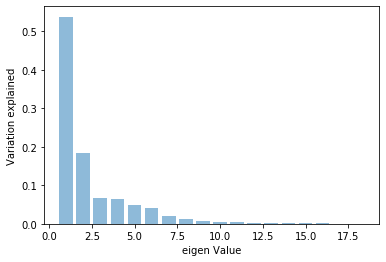

In [45]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

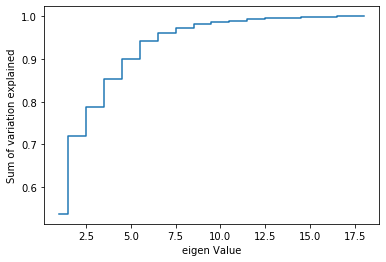

In [46]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Sum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Inference
* Hyperparameters are obtained
* From above we can see that 8 dimension are able to explain 95% variance of data. so we will use first 8 principal components

In [47]:
pca8 = PCA(n_components=8)
pca8.fit(X)
print(pca8.components_)
print(pca8.explained_variance_ratio_)
Xpca8 = pca8.transform(X)

[[ 0.27255198  0.28853807  0.30262988  0.26779425  0.09596704  0.1837484
   0.31124653 -0.30941651  0.30801692  0.279389    0.30150339  0.30749352
   0.26508079 -0.04106027  0.0412801   0.05853058  0.03602271  0.08249838]
 [-0.09252218  0.12909079 -0.05144546 -0.19471699 -0.24244021 -0.10248455
   0.07182501 -0.00925163  0.08418173  0.11896285  0.07371931  0.07879488
   0.20949485  0.50028894 -0.0393381  -0.09859506 -0.50746492 -0.51365454]
 [ 0.01209189 -0.20535706  0.09177783 -0.03019481 -0.24618835 -0.14241754
   0.12074028 -0.08565685  0.12462236 -0.20484735  0.11875993  0.12401684
  -0.21315722  0.01877628 -0.39806795  0.74297168 -0.04560543 -0.01516315]
 [-0.20023363 -0.01145724 -0.06819349  0.28247844  0.60998501 -0.04561651
  -0.01480084 -0.05271809 -0.03970583 -0.05659233  0.08471183 -0.02144501
   0.00407314  0.15708326 -0.65245227 -0.1659744  -0.04673238 -0.07508398]
 [ 0.16511743 -0.11624216 -0.10553968  0.10534274  0.0835488  -0.78577712
   0.11112636 -0.11731971  0.103057

In [48]:
Xpca8

array([[ 0.53520381, -0.61952372, -0.7316638 , ...,  1.10434998,
        -0.59599641, -0.54227204],
       [-1.53044366, -0.38336895,  0.02045315, ...,  0.04856493,
         0.19872388,  0.15119191],
       [ 3.87268059,  0.19890156, -1.10868786, ...,  0.95774258,
         0.62238763,  0.31100793],
       ...,
       [ 5.0447086 , -0.140807  , -0.80280523, ..., -0.75923193,
         0.76620887, -0.2725611 ],
       [-3.30671209, -1.06109469,  1.94828232, ..., -0.23457639,
        -0.32659124,  0.42619342],
       [-4.94069116,  0.42020585,  1.33780622, ..., -0.4373838 ,
        -0.34312165, -0.2484618 ]])

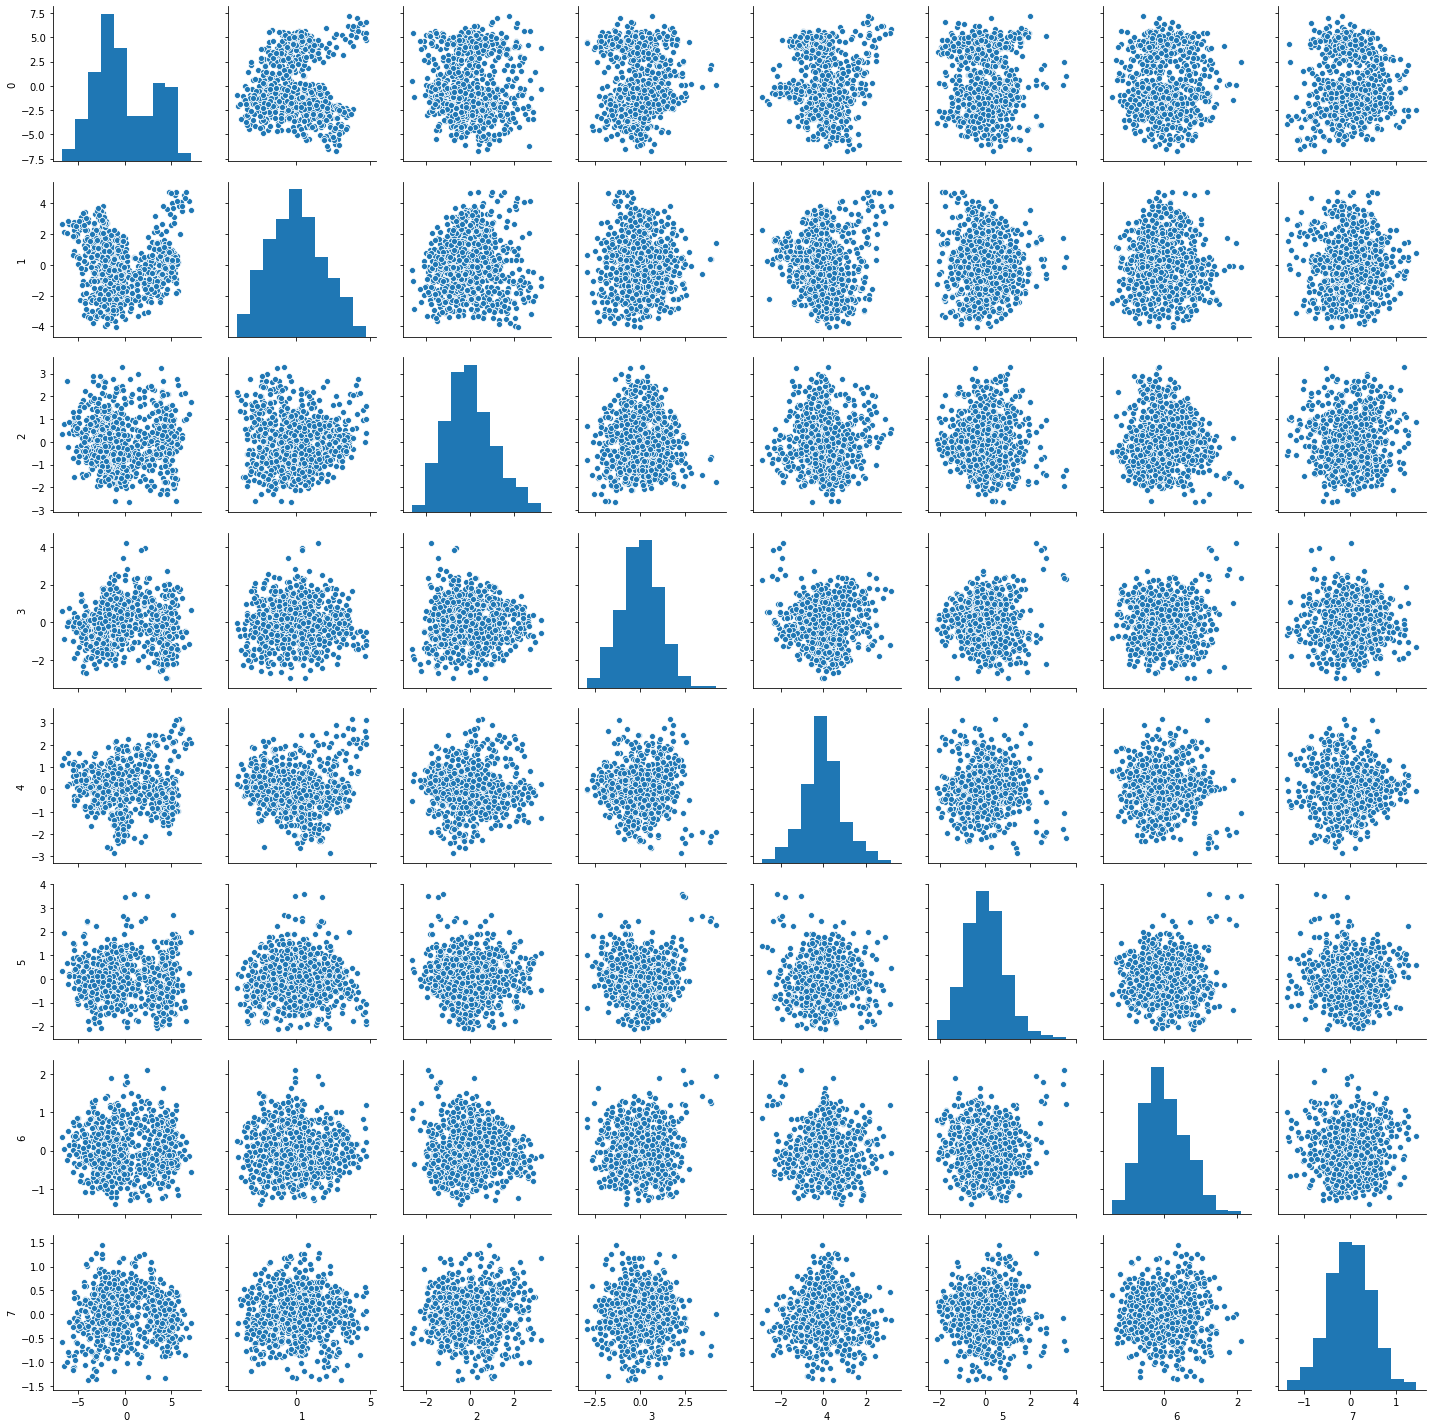

In [49]:
# plot pair graph using PCA 8 parameters intead of all 19
sns.pairplot(pd.DataFrame(Xpca8))

### Task 3: Split the data into train and test (Suggestion: specify  “random state” if you are using train_test_split from  Sklearn) 

#### Task 3 a: Split into Train and Test

Lets construct two SVM models. The first with all the 18 independent variables and the second with only the 8 new variables constructed using PCA.

In [50]:
# split data in 70 / 30 of all 18 dimesions
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((592, 18), (254, 18), (592,), (254,))

### Task 4: Train a support vector machine using the train set and get  the accuracy on the test set

In [52]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

svm = SVC(gamma = 'auto')
model = svm
model.fit(X_train, y_train)   # for the model with the train data

pred = model.predict(X_test)  # make predictions on the test set

score_train = round(model.score(X_train, y_train), 3) # accuracy for train data

score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set

print (score_train)
print (score)

print("Confusion matrix with raw data(18 dimension)\n",confusion_matrix(y_test,pred))

0.981
0.957
Confusion matrix with raw data(18 dimension)
 [[ 70   0   2]
 [  3 113   3]
 [  0   3  60]]


#### Task 4 b: Use Gridsearch to find appropriate hyperparametes

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1], 
      #    'gamma':[0.01, 0.02 , 0.03 , 0.04, 0.05],
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
gs = GridSearchCV(model, param_grid=params, n_jobs=-1,cv=10)
gs.fit(X_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",gs.best_params_)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


### Task 5: Perform K-fold cross-validation and get the  cross-validation score of the model

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds)
model = gs
results = cross_val_score(gs,X_train,y_train, cv=kfold)
print(results)
cross_val_score_raw = "for raw data (18 dimension) cross_val_score Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0)
print (cross_val_score_raw)

[0.96666667 0.98333333 0.96610169 0.93220339 0.98305085 0.94915254
 0.94915254 0.98305085 1.         0.96610169]
for raw data (18 dimension) cross_val_score Accuracy: 96.788% (1.927%)


### Task 6: Use PCA from Scikit learn, extract Principal Components  that capture about 95% of the variance in the data 
#### Task 6 a : PCA with 95% variance captured

In [55]:
prediction=gs.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
accuracy_score_raw = metrics.accuracy_score(prediction,y_test)
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,prediction))

Accuracy: 0.9566929133858267
Confusion Matrix:
 [[ 70   0   2]
 [  3 113   3]
 [  0   3  60]]


#### Test Accuracy (95.66%) is well in range of 95% confidence interval (86.8% to 99.6%)

### Task 7: Repeat steps 3,4 and 5 but this time, use Principal  Components instead of the original data. And the  accuracy score should be on the same rows of test data  that were used earlier. (hint: set the same random state)

In [56]:
# for PCA 8 dimensions
# split data in 70 / 30 of 8 dimesions

from sklearn.model_selection import train_test_split
X_train_pca8, X_test_pca8, y_train_pca8, y_test_pca8 = train_test_split(Xpca8, y, train_size=0.7, test_size=0.3, random_state=100)
X_train_pca8.shape,X_test_pca8.shape, y_train_pca8.shape, y_test_pca8.shape

((592, 8), (254, 8), (592,), (254,))

In [57]:
svm = SVC(gamma = 'auto')
model = svm
model.fit(X_train_pca8, y_train_pca8)   # for the model with the train data

pred_pca8 = model.predict(X_test_pca8)  # make predictions on the test set

score_train_pca8 = round(model.score(X_train_pca8, y_train_pca8), 3) # accuracy for train data

score_pca8= round(model.score(X_test_pca8, y_test_pca8), 3)   # compute accuracy score for test set

print (score_train_pca8)
print (score_pca8)

print("Confusion matrix with PCA data (8 dimension)\n",confusion_matrix(y_test_pca8,pred_pca8))

0.985
0.933
Confusion matrix with PCA data (8 dimension)
 [[ 69   1   2]
 [  4 111   4]
 [  0   6  57]]


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1], 
      #    'gamma':[0.01, 0.02 , 0.03 , 0.04, 0.05],
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
gs = GridSearchCV(model, param_grid=params, n_jobs=-1,cv=10)
gs.fit(X_train_pca8, y_train_pca8)
#The best hyper parameters set
print("Best Hyper Parameters:\n",gs.best_params_)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds)
model = gs
results = cross_val_score(gs,X_train_pca8,y_train_pca8, cv=kfold)
print(results)
cross_val_score_pca8 = "for pca (8 dimension) cross_val_score Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0)
print(cross_val_score_pca8)

[0.95       0.96666667 0.98305085 0.94915254 0.96610169 0.93220339
 0.93220339 0.94915254 0.96610169 0.94915254]
for pca (8 dimension) cross_val_score Accuracy: 95.438% (1.527%)


In [60]:
prediction_pca8=gs.predict(X_test_pca8)
print("Accuracy:",metrics.accuracy_score(prediction_pca8,y_test_pca8))
accuracy_score_pca8 = metrics.accuracy_score(prediction_pca8,y_test_pca8)
#evaluation(Confusion Metrix)

print("Confusion Matrix:\n",metrics.confusion_matrix(y_test_pca8,prediction_pca8))

Accuracy: 0.9212598425196851
Confusion Matrix:
 [[ 68   2   2]
 [  5 109   5]
 [  0   6  57]]


#### Test Accuracy (92.12%) is well in range of 95% confidence interval (86.8% to 99.6%)

#### Task 8. Compare the accuracy scores and cross-validation scores  of Support vector machines – one trained using raw data  and the other using Principal Components, and mention  your findings (10 points)  

In [61]:
print(f'for raw data (18 dimension) accuracy_score: {accuracy_score_raw}\n{cross_val_score_raw}')
print(f'for pca (8 dimension) accuracy_score: {accuracy_score_pca8}\n{cross_val_score_pca8}')


for raw data (18 dimension) accuracy_score: 0.9566929133858267
for raw data (18 dimension) cross_val_score Accuracy: 96.788% (1.927%)
for pca (8 dimension) accuracy_score: 0.9212598425196851
for pca (8 dimension) cross_val_score Accuracy: 95.438% (1.527%)


#### Inference
* Looking at the confusion matrix, model predicts all the vans correctly through Silhoutte
* From above we can see that PCA is performing well. The dimesions was reduced from 18 dimesions to 8 dimension.
* **Accuracy with pca is about 92% and with raw data about 95%**
* Please note that pca 92% accuracy is with only 8 dimensions where as rawdata has 18 dimensions
* Generally we determine whether a given model is optimal by looking at it’s F1, precision, recall, and accuracy (for classification), or it’s coefficient of determination (R2) and error (for regression)
* In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set.
* **The cross validation score for raw (18 dimensions) is 96.78% (with SD 1.92%) and PCA for 8 dimension is 95.43% (with SD 1.52%)**